<a href="https://colab.research.google.com/github/Bestakdv/vhs-intro-ai/blob/main/road_network_analysis_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate a Road Network Graph Using `osmnx`
In this coding challenge, we are going to work with road network data from [OpenStreetMap](https://www.openstreetmap.org/#map=4/38.01/-95.84) using the [osmnx](https://osmnx.readthedocs.io/en/stable/index.html) python package.

*You need to answer ALL question prompts in this notebook. Question prompts are all italicized.*



### 1. Install the `osmnx` Library

Before you begin, ensure that the `osmnx` library is installed. You can do this by running the following command:




```
!pip install osmnx
```



In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.1
    Uninstalling networkx-3.4.1:
      Successfully uninstalled networkx-3.4.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


### 2. Import the Required Libraries
Next, you will need to import the necessary libraries in your Python code, and check the version.

In [2]:
import osmnx as ox
ox.__version__

'1.9.4'

### 3. Generate the Graph for a Specific Location

Now, you will generate a road network graph from a specific address.

In this example, we will use the school address: "13051 Whittington Drive, Houston, TX" and generate a graph of roads within a 5,000-meter radius (5 km). We will use the `ox.graph.graph_from_address()` method. (See documentation: https://osmnx.readthedocs.io/en/stable/user-reference.html)

* `address`: This is the starting location around which the graph will be generated. You can replace this address with any other address.
* `dist`: This specifies the radius (in meters) around the address for which the network will be created. In this case, the radius is 5,000 meters (or 5 km).
* `network_type`: This specifies the type of network you want to extract. Options include:
  * "drive": For driving (car) routes.
  * "walk": For pedestrian routes.
  * "bike": For cycling routes.
  * "all": For all types of routes.

In [3]:
# Add code in the blanks
G = ox.graph_from_address(
     address="13051 Whittington Drive, Houston, TX",
     dist=5000,
     network_type="all"
)

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


### 4. Visualize the graph
We will use the `ox.project_graph()` and `ox.plot_graph()` methods to visualize the graph.

*4.1 Modify the `node_size` parameter. How does it change the visualisation?*

**Answer:** Changing the node_size parameter makes the visualisation brighter as the nodes become bigger as the the node_size increases


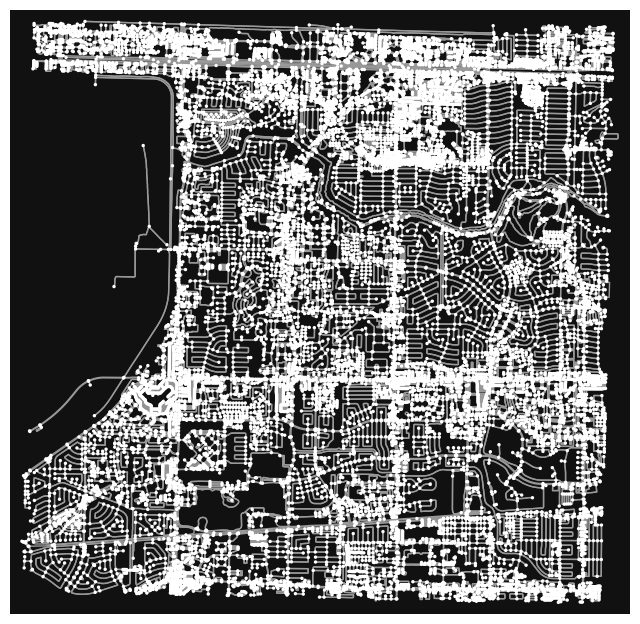

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
Gp = ox.project_graph(G)
ox.plot_graph(Gp, node_size=6)

### 5. Analyze the graph

*5.1 How many nodes are in the graph? [Use: `G.nodes()`]*
**Answer:** 23497 nodes are in the graph

In [5]:
nodes_list = list(G.nodes())
print(len(nodes_list))
#or
print(len(G.nodes))

23497
23497


*5.2 How many edges are in the graph? [Use: `G.edges`]*
**Answer:** there are 59918 edges

In [6]:
# ADD CODE HERE
edges_list = list(G.edges())
print(len(edges_list))
#or
print(len(G.edges))

59918
59918


*5.3 What information does the node store? Run the code below to get the information for the first node in the graph.*
**Answer:** The node stores the x and y value of the node, and street count

In [7]:
current_node = nodes_list[0]
print(f"Node {current_node}: {G.nodes[current_node]}")

Node 151365266: {'y': 29.749123, 'x': -95.5721842, 'street_count': 4}


*5.4 What information does the edge store? Is the edge weight part of this information?

**Answer:** The edge stores highway, oneway, lanes, name, reversed and length and edge weight could be the length

In [8]:
# ADD CODE HERE
current_edge = list(G.edges(data=True))[0]
u, v, edge_data = current_edge
print(f"Edge from node {u} to node {v}: {edge_data}")

Edge from node 151365266 to node 8292157400: {'osmid': 422675002, 'oneway': True, 'lanes': '2', 'name': 'Wilcrest Drive', 'highway': 'secondary', 'reversed': False, 'length': 17.28}


*5.5 Create a new graph, `G_walk` by specifying `network_type` to "walk". Visualize it and compare it with the road network. How many nodes and edges does `G_walk` contain?*

**Answer:** G_walk has 20159 nodes and 57540 edges

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


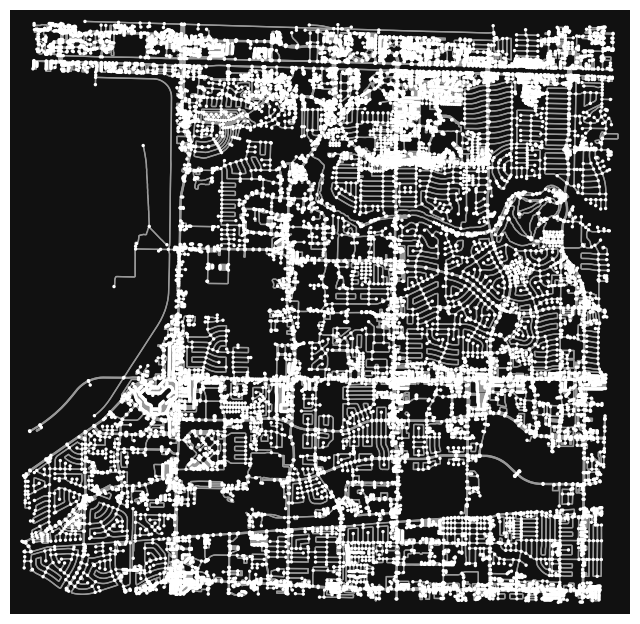

20159
57540


In [9]:
# ADD CODE HERE
G_walk = ox.graph_from_address(
     address="13051 Whittington Drive, Houston, TX",
     dist=5000,
     network_type="walk"
)

Gp1 = ox.project_graph(G_walk)
ox.plot_graph(Gp1, node_size=6)

print(len(G_walk.nodes))
print(len(G_walk.edges))

# Shortest Path using `osmnx`

To find the shortest path, we will use the `shortest_path` method.

### 6. Setup Origin and Destination Nodes
But first, we need to specify the origin and destination using the latitude and longitude values for the location.



 Use google maps, to find the lat-long values of:
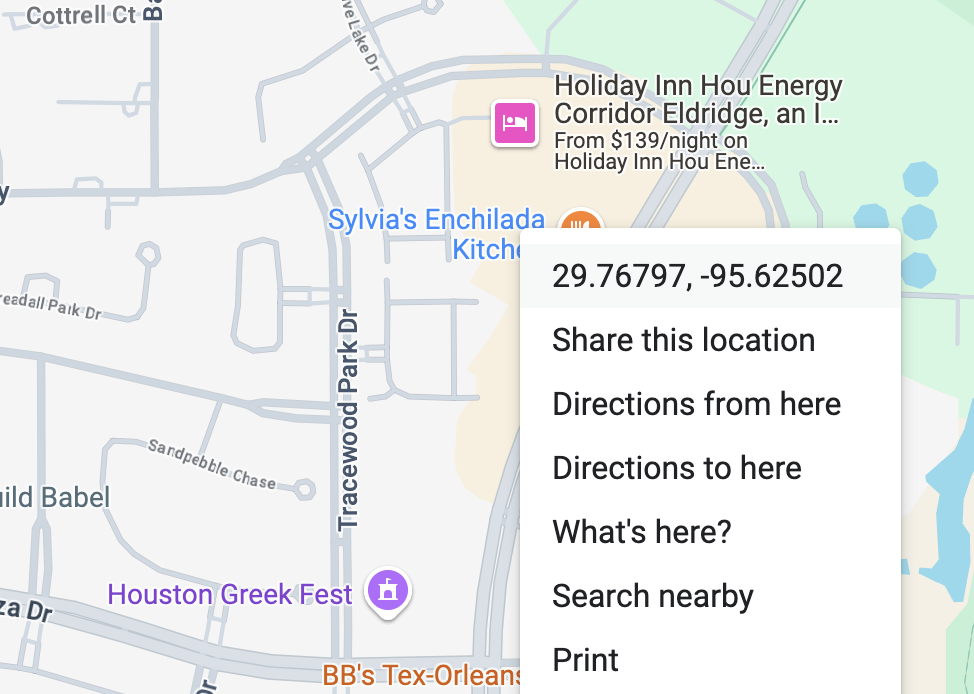
* origin - Village High School
* destination -  Sylvia's Enchilada Kitchen

*6.1 Specify the latitude & longitude as tuple.*

In [10]:
origin = (29.74649479652447, -95.61900340979507) # Point A
destination = (29.774182870720324, -95.61487970221935) # Point B

*6.2 Next use the `nearest_nodes()` method to get the node in the graph that is nearest to the specified location. Note that `x` is longitude and `y` is latitude.*

In [11]:
origin_node = ox.distance.nearest_nodes(G, X=origin[1], Y=origin[0])
destination_node = ox.distance.nearest_nodes(G, X=destination[1], Y=destination[0])

### 7. Find shortest path using `osmnx` `shortest_path()` method
Now we are ready to find the shortest path between the origin and destination using the shortest_path method.

In [12]:
route = ox.shortest_path(G, origin_node, destination_node)

Visualise the shortest path using `plot_graph_route()` method.

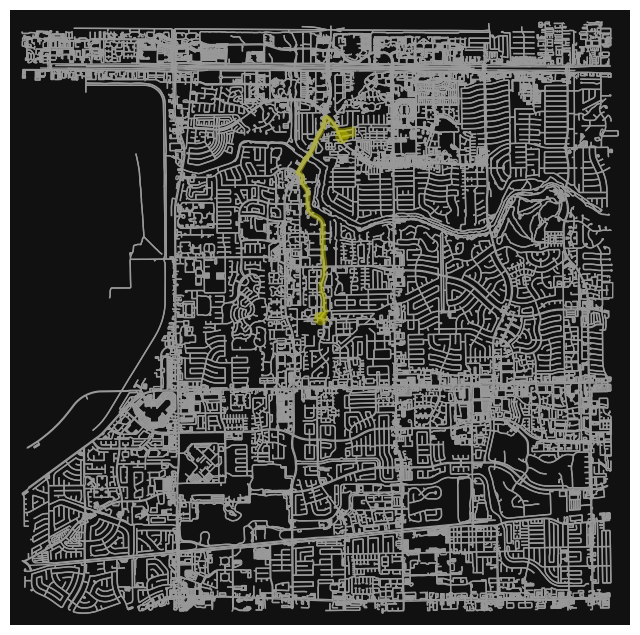

In [13]:
fig, ax = ox.plot_graph_route(G, route, route_color="y", node_size=0)

# Shortest Path using your Dijkstra's method



*8.1 Use the `GraphL` class that you have already created in a previous lesson in this notebook. Note that `GraphL` class should have dijkstra_shortest_path() as a method.*

In [14]:
# ADD GraphL class definition here
import math
import heapq
class GraphL:
    #Constructor
    def __init__(self,num_vertices,directed=False):
      #Attributes
      self.dictionary = {x:[] for x in range (num_vertices)}
      self.directed = directed
      self.num_vertices = num_vertices

    def add_edge(self,u,v,weight):
      #add weight to correct position
      if(not self.directed):
        self.dictionary[u].append([v,weight])

      self.dictionary[v].append([u,weight])

    def remove_edge(self,u,v):
        #removes edges from v,u
        if not self.directed:
          #checks that first tuple doesnt equal u
          self.dictionary[v] = [x for x in self.dictionary[v] if x[0] != u]

        #removes edges from u,v
        #checks that 2nd tuple doesnt equal v
        self.dictionary[u] = [x for x in self.dictionary[u] if x[0] != v]

    def display(self):
      for node in self.dictionary:
        print(node)

    def get_neighbors(self, vertex):
      if vertex in self.dictionary:
            return [neighbor[0] for neighbor in self.dictionary[vertex]]
      else:
            return []

    def has_edge(self,u,v):
      edges = self.dictionary.get(u, [])
      #loops to check is v is a neighbor
      for x in edges:
        if x[0] == v:
          return True

      return False

    def add_node(self, vertex):
      #checks if vertex doesn't exist then adds new one
      if vertex not in self.dictionary:
            self.dictionary[vertex] = []
            #increments the count of vertices
            self.num_vertices += 1

    #v is starting node
    def bfs(self, v):
        marked = [False] * self.num_vertices
        queue = [v]
        marked[v] = True

        output = []
        while queue:
            v = queue.pop(0)
            output.append(v)
            for w in self.get_neighbors(v):
                if not marked[w]:
                    marked[w] = True
                    queue.append(w)

        return output

    def bfs_shortest_path(self,start, end):
      #checking for robustness
      if start == end:
        print("Shortest path from", start, "to", end, "is:", start , "with length 0")
        return

      #track path with a list
      queue = [[start]]
      #store visiting nodes
      visited = set()
      visited.add(start)

      while queue:
          #get first path and last node in the path
          firstPath = queue.pop(0)
          current = firstPath[-1]

          for w in self.get_neighbors(current):
              if w not in visited:
                  #adds old path with the new node
                  path = firstPath + [w]
                  #check if it reached end node
                  if w == end:
                      print("Shortest path from", start, "to", end, "is:", path, "with length", len(path)-1)
                      return
                  #add new path to queue and mark neighbor as visited
                  queue.append(path)
                  visited.add(w)

    def dikjstras_shortest_path(self,start, end):
        #checking for robustness
        if start == end:
            print("Shortest path from", start, "to", end, "is:", start, "with length 0")
            return start

        #setting all nodes to infinity
        dist = {v: math.inf for v in self.dictionary}
        prev = {v: None for v in self.dictionary}

        path = []
        count=0

        #set distance of start node to 0
        dist[start] = 0
        #start node distance of 0 into list with high priority
        priorityQueue = [(0, start)]

        while priorityQueue:
            #remove node with small distance in prioqueue
            currentDist, v = heapq.heappop(priorityQueue)

            #stops when end is reached
            if v == end:
                break

            for neighbor, weight in self.dictionary[v]:
                #get potential distance
                distance = currentDist + weight
                if distance < dist[neighbor]:
                    #update shortest distance + prev(remember path)
                    dist[neighbor] = distance
                    prev[neighbor] = v
                    #insert neighbor with new distance into prioque
                    heapq.heappush(priorityQueue, (distance, neighbor))
                    count += 1

        #start at end
        v = end

        while prev[v] is not None:
            #insert node and then move nodes
            path.insert(0, v)
            v = prev[v]

        #add start node
        path.insert(0, start)

        #check for robustness of no path
        if dist[end] == math.inf:
            print("No path found")
            print(count)
            return

        print("Shortest path from", start, "to", end, "is:", path, "with length", dist[end])
        print(count)
        return path

*8.2 Now we will copy the nodes from the `osmnx` graph to our adjacency list graph representation.*

In [15]:
myG = GraphL(num_vertices=len(G.nodes()))

In [22]:
for node in G.nodes():
    myG.add_node(node)

for node in G.nodes():
    for neighbor, data in G[node].items():
        for edge_data in data.values():
            weight = edge_data.get('length', 1)
            myG.add_edge(node, neighbor, weight)

*8.3 Display the graph using the display() method in the `GraphL` class.*

In [17]:
myG.display()

Streaming output truncated to the last 5000 lines.
6989995499
6989995505
6989995506
6989995507
6989995510
6989995512
6989995519
6989995521
6989995523
6989995524
6989995526
6989995529
6989995530
6989995533
6989995535
6989995536
6990006458
6996251252
6996263576
6996279585
6996279586
6996279592
6996279599
6996292986
6996292992
6996292993
6996292994
6996292995
6996292996
6996292997
6996293007
6996293013
6996293022
6996293027
6996293028
6996293030
6996293031
6996293032
6996293033
6996293034
6996293035
6996314246
6996314255
6996314257
6996314258
6996314259
6996314261
6996314262
6996314264
6996314265
6996314266
6996314270
6996314276
6996314282
6996314283
6996314284
6996314645
6996314646
6996314647
6996314649
6996314651
6996314653
6996314655
6996314656
6996314658
6996314659
6996316885
6996316886
6996316887
6996316888
6996316889
6996316891
6996324092
6996324093
6996324096
6996324097
6996324098
6996324102
6996324103
6996324104
6996324105
6996324106
6996324107
6996324108
6996324109
6996324111
699

* Get the shortest path by calling `dijkstra_shortest_path()` method with the newly created `myG` graph.

* Plot the path and compare it with the output of the `shortest_path()` from the `osmnx` package.

*8.4 Compare the results.Does your implementation give the same route as that of the `osmnx` package?*

# Your Turn
*9. Modify the graph to include a 20 km radius around an address of your choice. Choose at least 2 (origin, destination) pairs and compute shortest path using your Dijkstra's method. Visualize the results.*

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


Shortest path from 151913138 to 6987209880 is: [151913138, 4247134939, 4247134941, 152453103, 4247134933, 4247134923, 4247134925, 151932090, 151932080, 151932794, 151932049, 152533940, 4247134918, 4247134905, 151913145, 151378994, 151913168, 151950506, 151932809, 151950494, 151893561, 4247022793, 152533938, 152533935, 151967681, 459189859, 152520555, 151379021, 151967804, 152533931, 4247134891, 610953499, 5956103330, 1196242087, 11950559833, 152534831, 608123329, 11950559835, 1196242101, 5956103326, 5956103327, 3911062452, 11950547318, 11950559848, 3154366273, 3911061850, 4389689272, 4389689242, 3154366283, 4389689253, 3154361848, 3154361858, 5379260472, 152265841, 5379260469, 3154361851, 3154365964, 5379242460, 3154365967, 3154663462, 3154365977, 3154366024, 4389753312, 6987209880] with length 6464.268999999999
21856


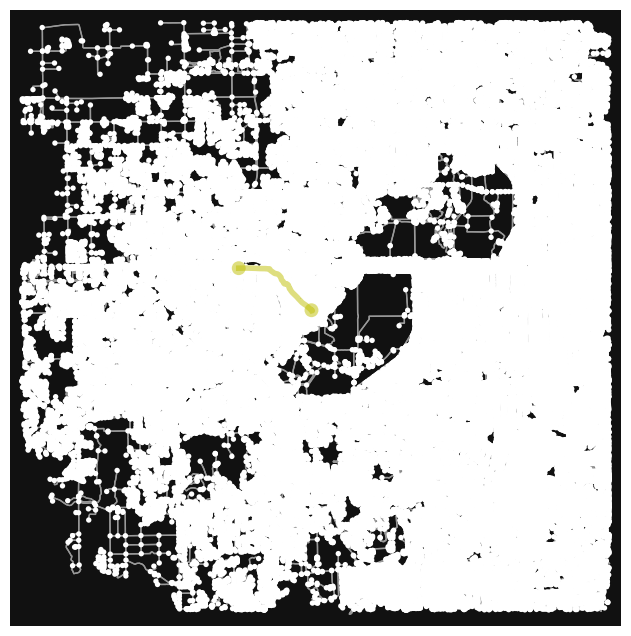

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
G_modify = ox.graph_from_address(
     address="19910 Stonelodge Drive, Katy, TX",
     dist=20000,
     network_type="all"
)

origin_node = ox.distance.nearest_nodes(G_modify, X=-95.76936856079442, Y=29.78475252436367)
destination_node = ox.distance.nearest_nodes(G_modify, X=-95.7180590970288, Y=29.75915682633438)

myG = GraphL(num_vertices=len(G_modify.nodes()))

for node in G_modify.nodes():
    myG.add_node(node)

for node in G_modify.nodes():
    for neighbor, data in G_modify[node].items():
        for edge_data in data.values():
            weight = edge_data.get('length', 1)
            myG.add_edge(node, neighbor, weight)

fig, ax = ox.plot_graph(G_modify, show=False, close=False)

path = myG.dikjstras_shortest_path(origin_node, destination_node)
ox.plot_graph_route(G_modify, path, ax=ax, route_color='y', node_size=0)

# AStar Algorithm


# Heuristic

What is a heuristic?
**A heuristic is a estimate. In the case of A* algorithm it is used to estimate the cost of the current node it is at to the end node**

In [103]:
#chatGPT implementation
import heapq
import math

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, weight):
        if u not in self.graph:
            self.graph[u] = {}
        if v not in self.graph:
            self.graph[v] = {}
        self.graph[u][v] = weight
        self.graph[v][u] = weight  # For undirected graph

def haversine(coord1, coord2):
    """Calculate the Haversine distance between two coordinates."""
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in kilometers

def astar(graph, start, goal, coords):
    open_list = []
    heapq.heappush(open_list, (0, start))  # (f_score, node)
    g_scores = {node: float('inf') for node in graph.graph}
    g_scores[start] = 0
    f_scores = {node: float('inf') for node in graph.graph}
    f_scores[start] = haversine(coords[start], coords[goal])  # Use Haversine for initial heuristic

    came_from = {}

    while open_list:
        current_f, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path

        for neighbor, weight in graph.graph[current].items():
            tentative_g_score = g_scores[current] + weight

            if tentative_g_score < g_scores[neighbor]:
                came_from[neighbor] = current
                g_scores[neighbor] = tentative_g_score
                f_scores[neighbor] = tentative_g_score + haversine(coords[neighbor], coords[goal])

                if (f_scores[neighbor], neighbor) not in open_list:
                    heapq.heappush(open_list, (f_scores[neighbor], neighbor))

    return None  # No path found

In [99]:
class GraphL:
    def __init__(self, graph):
        self.graph = graph

    def add_edge(self,u,v,weight):
      #add weight to correct position
      if(not self.directed):
        self.dictionary[u].append([v,weight])

      self.dictionary[v].append([u,weight])

    def remove_edge(self,u,v):
        #removes edges from v,u
        if not self.directed:
          #checks that first tuple doesnt equal u
          self.dictionary[v] = [x for x in self.dictionary[v] if x[0] != u]

        #removes edges from u,v
        #checks that 2nd tuple doesnt equal v
        self.dictionary[u] = [x for x in self.dictionary[u] if x[0] != v]

    def display(self):
      for node in self.dictionary:
        print(node)

    def get_neighbors(self, vertex):
      if vertex in self.dictionary:
            return [neighbor[0] for neighbor in self.dictionary[vertex]]
      else:
            return []

    def has_edge(self,u,v):
      edges = self.dictionary.get(u, [])
      #loops to check is v is a neighbor
      for x in edges:
        if x[0] == v:
          return True

      return False

    def add_node(self, vertex):
      #checks if vertex doesn't exist then adds new one
      if vertex not in self.dictionary:
            self.dictionary[vertex] = []
            #increments the count of vertices
            self.num_vertices += 1

    #v is starting node
    def bfs(self, v):
        marked = [False] * self.num_vertices
        queue = [v]
        marked[v] = True

        output = []
        while queue:
            v = queue.pop(0)
            output.append(v)
            for w in self.get_neighbors(v):
                if not marked[w]:
                    marked[w] = True
                    queue.append(w)

        return output

    def bfs_shortest_path(self,start, end):
      #checking for robustness
      if start == end:
        print("Shortest path from", start, "to", end, "is:", start , "with length 0")
        return

      #track path with a list
      queue = [[start]]
      #store visiting nodes
      visited = set()
      visited.add(start)

      while queue:
          #get first path and last node in the path
          firstPath = queue.pop(0)
          current = firstPath[-1]

          for w in self.get_neighbors(current):
              if w not in visited:
                  #adds old path with the new node
                  path = firstPath + [w]
                  #check if it reached end node
                  if w == end:
                      print("Shortest path from", start, "to", end, "is:", path, "with length", len(path)-1)
                      return
                  #add new path to queue and mark neighbor as visited
                  queue.append(path)
                  visited.add(w)

    def dikjstras_shortest_path(self,start, end):
        #checking for robustness
        if start == end:
            print("Shortest path from", start, "to", end, "is:", start, "with length 0")
            return start

        #setting all nodes to infinity
        dist = {v: math.inf for v in self.dictionary}
        prev = {v: None for v in self.dictionary}

        path = []
        count=0

        #set distance of start node to 0
        dist[start] = 0
        #start node distance of 0 into list with high priority
        priorityQueue = [(0, start)]

        while priorityQueue:
            #remove node with small distance in prioqueue
            currentDist, v = heapq.heappop(priorityQueue)

            #stops when end is reached
            if v == end:
                break

            for neighbor, weight in self.dictionary[v]:
                #get potential distance
                distance = currentDist + weight
                if distance < dist[neighbor]:
                    #update shortest distance + prev(remember path)
                    dist[neighbor] = distance
                    prev[neighbor] = v
                    #insert neighbor with new distance into prioque
                    heapq.heappush(priorityQueue, (distance, neighbor))
                    count += 1

        #start at end
        v = end

        while prev[v] is not None:
            #insert node and then move nodes
            path.insert(0, v)
            v = prev[v]

        #add start node
        path.insert(0, start)

        #check for robustness of no path
        if dist[end] == math.inf:
            print("No path found")
            print(count)
            return

        print("Shortest path from", start, "to", end, "is:", path, "with length", dist[end])
        print(count)
        return path

    def haversine(coord1, coord2):
      R = 6371
      lat1, lon1 = radians(coord1[0]), radians(coord1[1])
      lat2, lon2 = radians(coord2[0]), radians(coord2[1])

      dlat = lat2 - lat1
      dlon = lon2 - lon1

      a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
      c = 2 * atan2(sqrt(a), sqrt(1 - a))

      distance = R * c
      #converting the distance to meters
      return distance * 1000

    def astar(self,start,end):

        priorityQueue = []
        heapq.heappush(priorityQueue, (0, start))

        gScore = {node: math.inf for node in self.graph.nodes}
        gScore[start] = 0

        pathFrom = {}

        fScore = {node: math.inf for node in self.graph.nodes}

        #set of visited nodes to keep track
        closedSet = set()

        while priorityQueue:
            #gets node of lowest cost and needs _ cause tuple
            _, currentNode = heapq.heappop(priorityQueue)

            if currentNode == end:
                return self.reconstructPath(pathFrom, currentNode)

            closedSet.add(currentNode)

            #explore neighbors
            for neighbor, edgeData in self.graph[currentNode].items():
                #skips visited nodes
                if neighbor in closedSet:
                    continue

                estimate = gScore[currentNode] + edgeData[0].get('length', math.inf)

                if estimate < gScore[neighbor]:
                    pathFrom[neighbor] = currentNode
                    gScore[neighbor] = estimate

                    hScore = haversine(
                        (self.graph.nodes[neighbor]['y'], self.graph.nodes[neighbor]['x']),
                        (self.graph.nodes[end]['y'], self.graph.nodes[end]['x'])
                    )

                    fScore[neighbor] = gScore[neighbor] + hScore

                    #adds neighbor if not in prioque
                    if neighbor not in [n[1] for n in priorityQueue]:
                        heapq.heappush(priorityQueue, (fScore[neighbor], neighbor))

        print("No path found")
        return None

    def reconstructPath(self, pathFrom, current):
        path = [current]
        while current in pathFrom:
            current = pathFrom[current]
            path.append(current)
        #reverses order of path
        path.reverse()
        return path

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


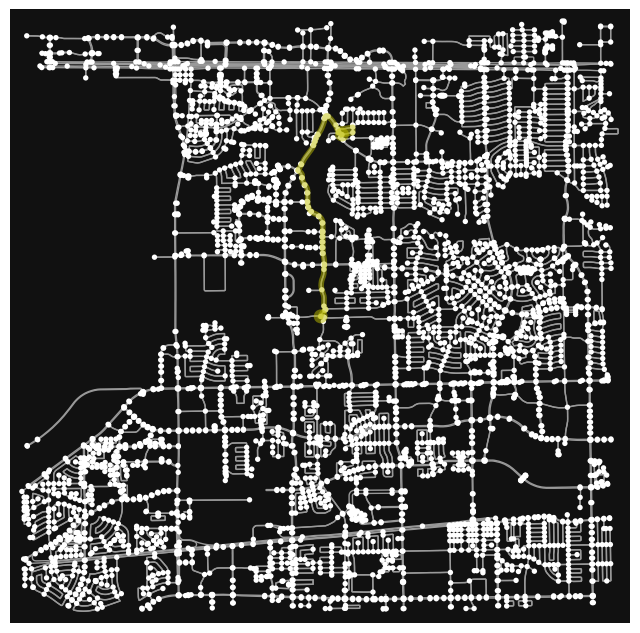

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [100]:
G = ox.graph_from_address(
    address="13051 Whittington Drive, Houston, TX",
    dist=5000,
    network_type="drive"
)

origin_coords = (29.74649479652447, -95.61900340979507)
destination_coords = (29.774182870720324, -95.61487970221935)

origin_node = ox.distance.nearest_nodes(G, X=origin_coords[1], Y=origin_coords[0])
destination_node = ox.distance.nearest_nodes(G, X=destination_coords[1], Y=destination_coords[0])

g = GraphL(G)
path = g.astar(origin_node, destination_node)

fig, ax = ox.plot_graph(G, show=False, close=False)
ox.plot_graph_route(G, path, ax=ax, route_color='y', node_size=0)